In [188]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [189]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [190]:
# Importing the dataset
dataset = pd.read_csv('/content/gdrive/MyDrive/Loan predict.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [191]:
# Understanding dataset informations
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


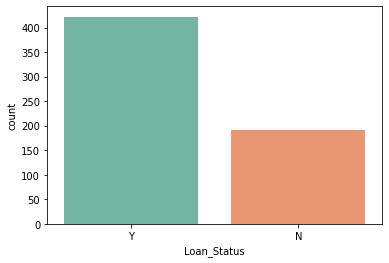

In [192]:
# Visualizing the dataset
sns.countplot(x='Loan_Status', data=dataset, palette = 'Set2')

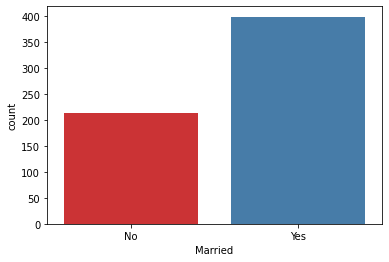

In [196]:
sns.countplot(x='Married', data=dataset, palette = 'Set1')

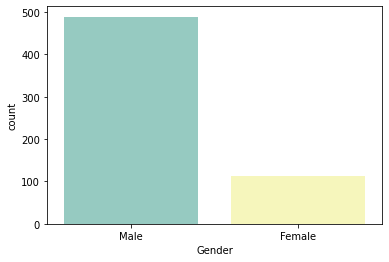

In [197]:
sns.countplot(x='Gender', data=dataset, palette = 'Set3')

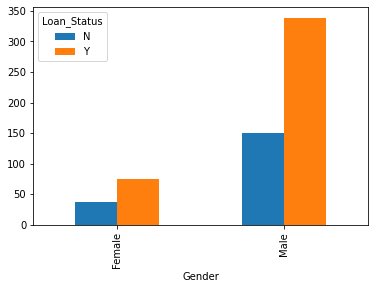

In [198]:
gender = dataset.groupby(['Gender', 'Loan_Status']).Loan_Status.count().unstack()
gender.plot(kind='bar')

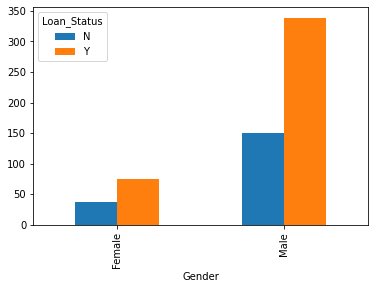

In [199]:
gender = dataset.groupby(['Gender', 'Loan_Status']).Loan_Status.count().unstack()
gender.plot(kind='bar')

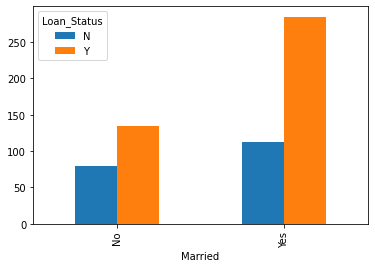

In [200]:
married = dataset.groupby(['Married', 'Loan_Status']).Loan_Status.count().unstack()
married.plot(kind='bar')

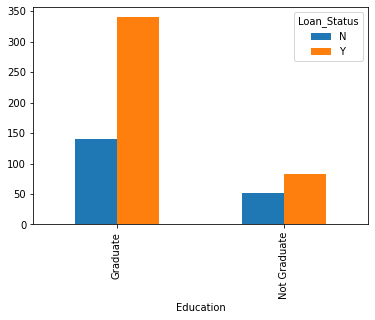

In [201]:
education = dataset.groupby(['Education', 'Loan_Status']).Loan_Status.count().unstack()
education.plot(kind='bar')

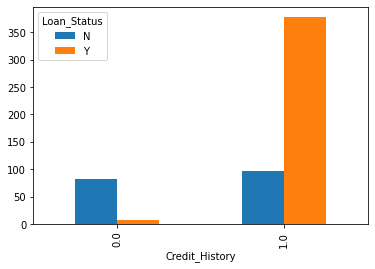

In [205]:
credit = dataset.groupby([ 'Credit_History', 'Loan_Status'  ]).Loan_Status.count().unstack()
credit.plot(kind='bar')

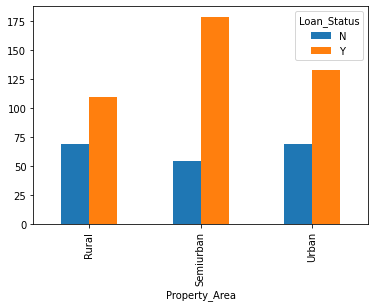

In [206]:
area = dataset.groupby(['Property_Area', 'Loan_Status']).Loan_Status.count().unstack()
area.plot(kind='bar')

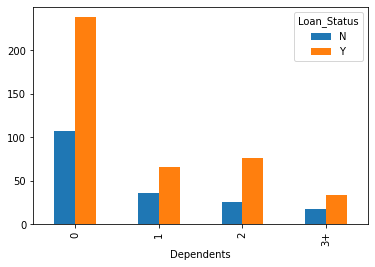

In [207]:
dependents = dataset.groupby(['Dependents', 'Loan_Status']).Loan_Status.count().unstack()
dependents.plot(kind='bar')

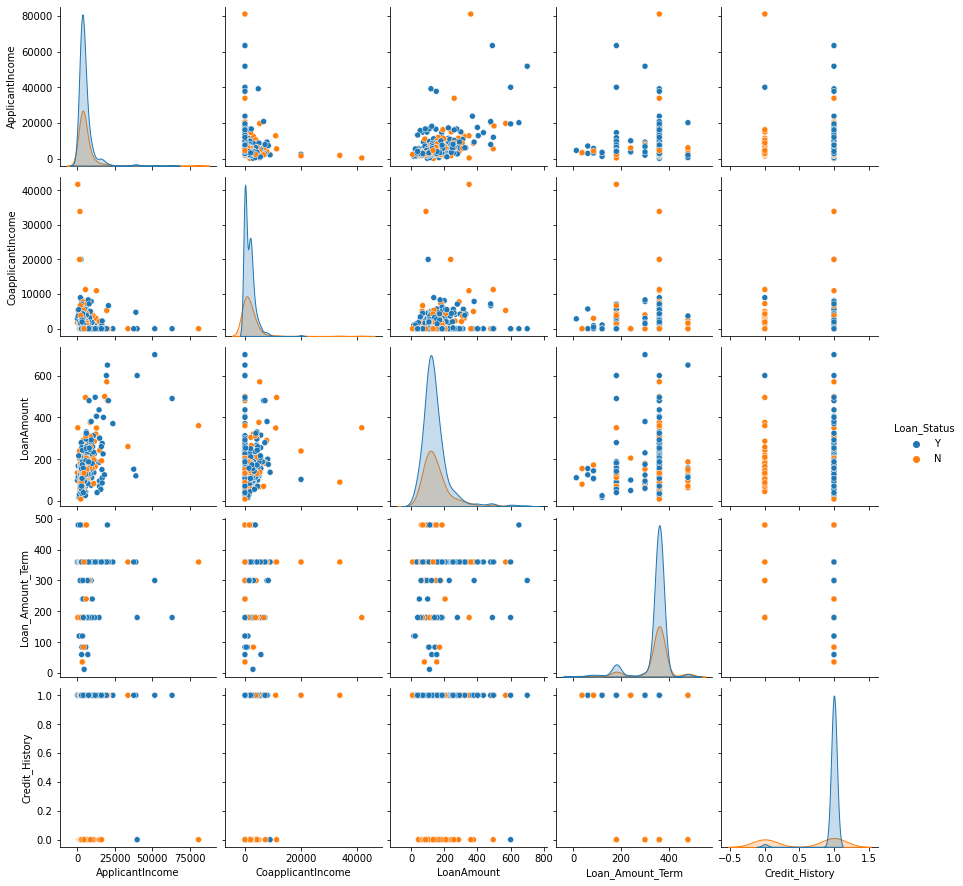

In [208]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=dataset, hue = 'Loan_Status')

In [209]:
# Check the number of missing values in each column using Integer
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [210]:
dataset.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [211]:
df= dataset.copy()

In [212]:
# Replacing missing values with most frequent value of the particular column
df['Gender'].fillna(df['Gender'].value_counts().idxmax(), inplace=True)
df['Married'].fillna(df['Married'].value_counts().idxmax(), inplace=True)
df['Dependents'].fillna(df['Dependents'].value_counts().idxmax(), inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].value_counts().idxmax(), inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].mean(skipna=True), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].value_counts().idxmax(), inplace=True)

In [213]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [214]:
# Replacing '3+' with '3'
dependents_stat = {'0':0,'1':1,'2':2,'3+':3}
df['Dependents'] = df['Dependents'].replace(dependents_stat)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [215]:
cols = ['Gender', 'Married', 'Education', 'Self_Employed' , 'Loan_Status']

# Encode labels of multiple columns at once
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [216]:
# Understanding the distribution of Loan status approval where 1 means approved
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

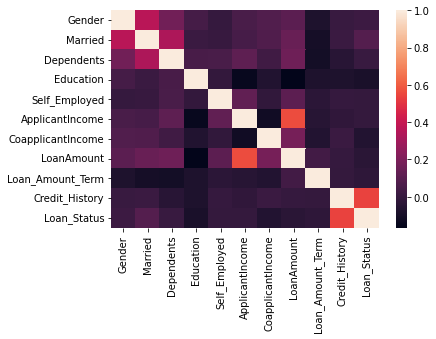

In [217]:
sns.heatmap(df.corr())

In [218]:
X = df.iloc[:,1:12].values
Y = df.iloc[: ,12].values
print (Y)

[1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0
 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1
 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1
 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1
 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 0 1 0 1 1 1 

In [219]:
print(X)

[[1 0 0 ... 360.0 1.0 'Urban']
 [1 1 1 ... 360.0 1.0 'Rural']
 [1 1 0 ... 360.0 1.0 'Urban']
 ...
 [1 1 1 ... 360.0 1.0 'Urban']
 [1 1 2 ... 360.0 1.0 'Urban']
 [0 0 0 ... 360.0 0.0 'Semiurban']]


In [220]:
#One-hot encoding categorical attribute 'Property_Area' 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [10])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X = X[:, 1:]
print(X)

[[0.0 1.0 1 ... 146.41216216216216 360.0 1.0]
 [0.0 0.0 1 ... 128.0 360.0 1.0]
 [0.0 1.0 1 ... 66.0 360.0 1.0]
 ...
 [0.0 1.0 1 ... 253.0 360.0 1.0]
 [0.0 1.0 1 ... 187.0 360.0 1.0]
 [1.0 0.0 0 ... 133.0 360.0 0.0]]


In [221]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 0)
print(X.shape, X_train.shape, X_test.shape)

(614, 12) (491, 12) (123, 12)


In [222]:
# Random Forest Classifier
# Fitting Random Forest Classification to the Training set 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 55, criterion =  'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=55, random_state=0)

In [223]:
# Predicting the Random Forest Classifier for both train and test data
Y_pred = classifier.predict(X_test)
Y_train_pred = classifier.predict(X_train)

In [224]:
#Making the confusion matrix for test data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[17 21]
 [ 4 81]]


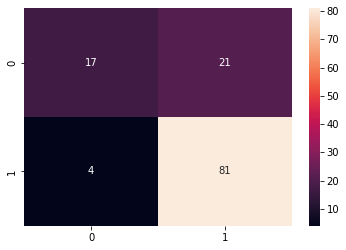

In [225]:
# Visualizing the confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True)

In [226]:
#Performance metrics for both the training and testing data

# Accuracy 
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(Y_train_pred, Y_train)
print('Accuracy on Training data is %f' % training_data_accuracy)
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy on Test data is %f' % accuracy)

#Precision
from sklearn.metrics import precision_score
training_data_precision = precision_score(Y_train_pred, Y_train)
print('Precision on Training data is %f' % training_data_precision)
precision = precision_score(Y_test, Y_pred)
print('Precision on Test data is %f' % precision)
 
# Recall
from sklearn.metrics import recall_score
training_data_recall = recall_score(Y_train_pred, Y_train)
print('Recall on Training data is %f' % training_data_recall)
recall = recall_score(Y_test, Y_pred)
print('Recall on Test data is %f' % recall)

Accuracy on Training data is 1.000000
Accuracy on Test data is 0.796748
Precision on Training data is 1.000000
Precision on Test data is 0.794118
Recall on Training data is 1.000000
Recall on Test data is 0.952941
